In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

input_folder = 'images'
output_folder = 'geometric_dists'
os.makedirs(output_folder, exist_ok=True)

In [4]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def translate_image(image, tx, ty):
    (h, w) = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, M, (w, h))
    return translated

def shear_image(image, shear_factor):
    (h, w) = image.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(image, M, (w, h))
    return sheared


In [5]:
def display_images(images, distorted_images, titles):
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        plt.subplot(len(images), len(distorted_images) + 1, i * (len(distorted_images) + 1) + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis('off')
        
        for j in range(len(distorted_images)):
            plt.subplot(len(images), len(distorted_images) + 1, i * (len(distorted_images) + 1) + j + 2)
            plt.imshow(cv2.cvtColor(distorted_images[j][i], cv2.COLOR_BGR2RGB))
            plt.title(titles[j])
            plt.axis('off')
    plt.show()

In [6]:
def apply_transformations(image_name, rotation_angle=45, tx=100, ty=100, shear_factor=0.5):
    image = cv2.imread(os.path.join(input_folder, image_name))
    rotated_images = []
    translated_images = []
    sheared_images = []
    
    for i in range(1,6):
        rotated_images.append(rotate_image(image, i * rotation_angle))
        translated_images.append(translate_image(image, i * tx, i * ty))
        sheared_images.append(shear_image(image, i * shear_factor))
    return rotated_images, translated_images, sheared_images

apply transforms

In [7]:
filenames = os.listdir(input_folder)
dis = {}
for n in filenames:
    rotated_images, translated_images, sheared_images = apply_transformations(n)
    dis[n] = [rotated_images, translated_images, sheared_images]


save images

In [8]:
out_rot = f"{output_folder}/rotations"
out_trn = f"{output_folder}/transtaltions"
out_shr = f"{output_folder}/sheared"

os.makedirs(out_rot, exist_ok=True)
os.makedirs(out_trn, exist_ok=True)
os.makedirs(out_shr, exist_ok=True)

for filename in filenames:
    entry = dis[filename]
    rotated_images, translated_images, sheared_images = entry
    for i in range(5):
        cv2.imwrite(f"{out_rot}/{filename}_{i}.jpg", rotated_images[i])
        cv2.imwrite(f"{out_trn}/{filename}_{i}.jpg", translated_images[i])
        cv2.imwrite(f"{out_shr}/{filename}_{i}.jpg", sheared_images[i])

comparing with a framework

In [36]:
import imgaug.augmenters as iaa

def img_aug_augment(image_name):
    image = cv2.imread(os.path.join(input_folder, image_name))
    rotated_images = []
    translated_images = []
    sheared_images = []

    for i in range(1,6):
        rotated_images.append(iaa.Affine(rotate=i * -45).augment_image(image))
        translated_images.append(iaa.Affine(translate_px={"x": i * 100, "y": i * 100}).augment_image(image))
        sheared_images.append(iaa.Affine(shear=i * -35).augment_image(image))
    
    return rotated_images, translated_images, sheared_images


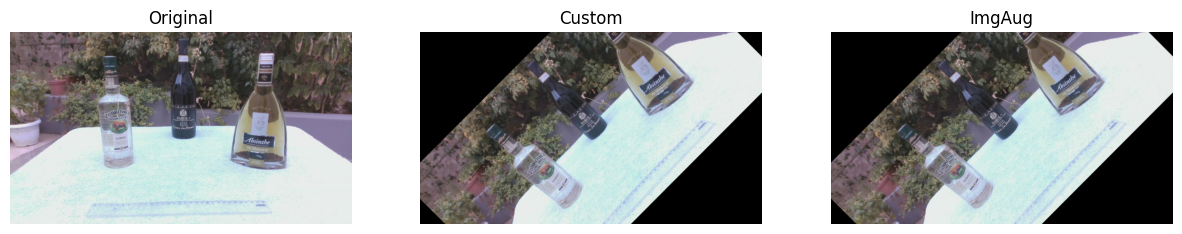

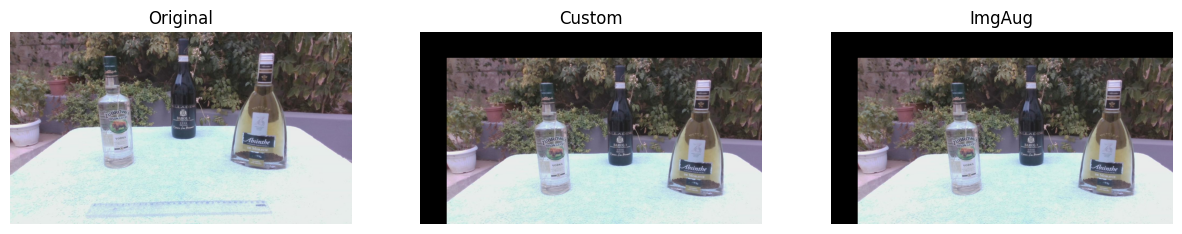

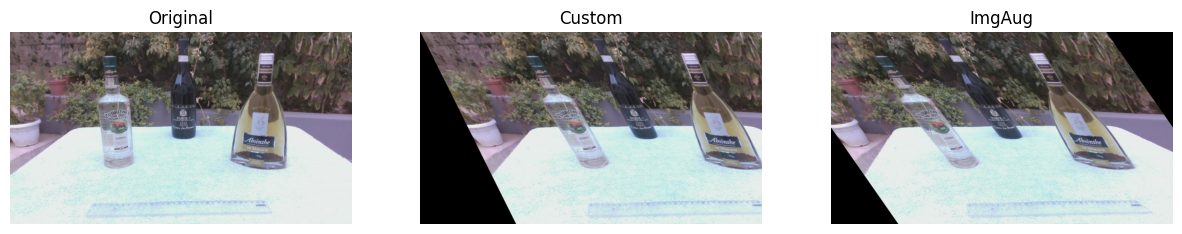

In [37]:

img_comp = filenames[0]

mine_r, mine_t, mine_s = apply_transformations(img_comp)
rotated_images, translated_images, sheared_images = img_aug_augment(img_comp)

# display original, custom implenetation and imgaug implementation side to side for each image
display_images([cv2.imread(os.path.join(input_folder, img_comp))], [mine_r, rotated_images], ["Custom", "ImgAug"])
display_images([cv2.imread(os.path.join(input_folder, img_comp))], [mine_t, translated_images], ["Custom", "ImgAug"])
display_images([cv2.imread(os.path.join(input_folder, img_comp))], [mine_s, sheared_images], ["Custom", "ImgAug"])

The image transformations are the same except for shear. Shearing  used a different metric and also sheared around the center of the image, hence producing different results